## What we've done:
 * clean data
 * reduce to multi-dimensional vector
     - We've decided on bag of words
     
     
## TO DO:
 * reduce testing data to multi-dimensional vector
     - The vectors are only for the words in the training set
 * classification
     - Selene output should be the original phrases before lemmatizing and stop-words
     - try a bunch of classifiers
 * graphing
     - graph the outputs of our classifiers
 * presentation
     - create a presentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # natural language tool kit

In [3]:
initialFrame = pd.read_csv('train.tsv', delimiter = '\t');
initialTestFrame = pd.read_csv('test 2.tsv', delimiter = '\t');

In [4]:
initialFrame

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [5]:
initialTestFrame

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


# Preprocess Data:
* Clean the frames of garbage rows
* All phrases in lower case
* All non-ascii characters removed
* All extra spaces removed
* All contractions expanded
* All punctuation replaced with spaces
* All stopwords removed
* All words lemmatized

In [6]:
# Cleans the initial frame
def cleanInitialFrame(df):
    cleanList = [] # list to grow
    currentSentence = 0 # tracks current sentence
    sentenceIDs = {0} 
    # Iterate row by row
    for index, row in df.iterrows():
        # If it's the first element, add to list
        if (row['SentenceId'] == currentSentence):
            continue
        else:
            cleanList.append([row['PhraseId'], row['SentenceId'], row['Phrase'], row['Sentiment']]);
            currentSentence = row['SentenceId']
    
    # Return a clean frame
    return pd.DataFrame(cleanList, columns = ['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'])

In [7]:
# Cleans the initial frame
def cleanInitialTestFrame(df):
    cleanList = [] # list to grow
    currentSentence = 0 # tracks current sentence
    sentenceIDs = {0} 
    # Iterate row by row
    for index, row in df.iterrows():
        # If it's the first element, add to list
        if (row['SentenceId'] == currentSentence):
            continue
        else:
            cleanList.append([row['PhraseId'], row['SentenceId'], row['Phrase']]);
            currentSentence = row['SentenceId']
    
    # Return a clean frame
    return pd.DataFrame(cleanList, columns = ['PhraseId', 'SentenceId', 'Phrase'])

<AxesSubplot:title={'center':'Sentiment Distribution'}, ylabel='Sentiment'>

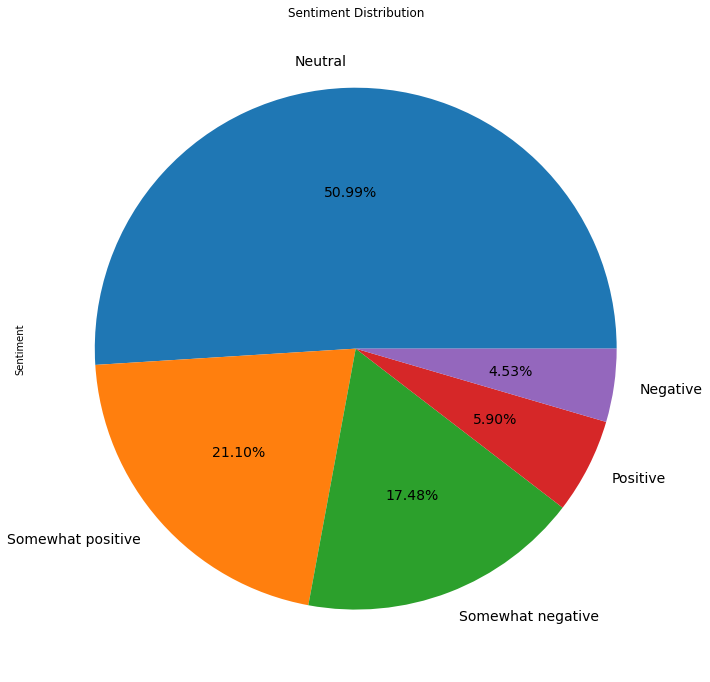

In [8]:
pie=initialFrame.copy(deep=True)
pie1=pd.DataFrame(pie['Sentiment'].replace(0,'Negative').replace(1,'Somewhat negative').replace(2,'Neutral').replace(3,'Somewhat positive').replace(4,'Positive').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Sentiment Distribution',y = 'Sentiment', 
          autopct='%1.2f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

In [9]:
df = cleanInitialFrame(initialFrame)
undf=initialFrame.copy(deep=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,64,2,"This quiet , introspective and entertaining in...",4
2,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
3,117,4,A positively thrilling combination of ethnogra...,3
4,157,5,Aggressive self-glorification and a manipulati...,1


In [10]:
testdf = cleanInitialTestFrame(initialTestFrame)
testdf.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156076,8546,Kidman is really the only thing that 's worth ...
2,156154,8547,Once you get into its rhythm ... the movie bec...
3,156178,8548,I kept wishing I was watching a documentary ab...
4,156219,8549,"Kinnear does n't aim for our sympathy , but ra..."


In [11]:
def lowerAllPhrases(df):
    phrases_list = list(df['Phrase'])

    for i in range(len(phrases_list)):
        phrases_list[i] = phrases_list[i].lower()
    count = 0;
    for index, row in df.iterrows():
        df.at[index,'Phrase'] = phrases_list[count]
        count += 1

    return df

In [12]:
lowerAllPhrases(df)
lowerAllPhrases(undf)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a series of escapades demonstrating the adage ...,1
1,2,1,a series of escapades demonstrating the adage ...,2
2,3,1,a series,2
3,4,1,a,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [13]:
lowerAllPhrases(testdf)

,PhraseId,SentenceId,Phrase
0,156061,8545,an intermittently pleasing but mostly routine ...
1,156076,8546,kidman is really the only thing that 's worth ...
2,156154,8547,once you get into its rhythm ... the movie bec...
3,156178,8548,i kept wishing i was watching a documentary ab...
4,156219,8549,"kinnear does n't aim for our sympathy , but ra..."
...,...,...,...
3305,222281,11851,not sweet enough to liven up its predictable s...
3306,222300,11852,"nasty , ugly , pointless and depressing , even..."
3307,222314,11853,"with tightly organized efficiency , numerous f..."
3308,222341,11854,they should have called it gutterball .


In [14]:
# Remove non-ascii characters using str.replace()
def asciiClean(df):
    # iterate row by row
    for index, row in df.iterrows():
        old_str = row['Phrase']
        new_str = (old_str.encode('ascii','ignore')).decode()
        df.at[index, 'Phrase'] = new_str

In [15]:
asciiClean(df)
asciiClean(undf)

In [16]:
asciiClean(testdf)

In [17]:
import re
def removeSpaces(df):
    for index, row in df.iterrows():
        # df['Phrase'] = df['Phrase'].replace([row['Phrase']], re.sub(r'\s+\'', "'", row['Phrase']))
        df.at[index,'Phrase'] = re.sub(r'\s+\'', "'", row['Phrase'])

In [18]:
removeSpaces(df)
removeSpaces(undf)

In [19]:
removeSpaces(testdf)

In [20]:
import contractions
contractions.add('n\'t', 'not')
def expandContractions(df):
    for index, row in df.iterrows():
        phrase = []
        for i in row['Phrase'].split():
            phrase.append(contractions.fix(i))
        string_version = ' '.join(phrase)
        df.at[index, 'Phrase'] = string_version            

In [21]:
expandContractions(df)
expandContractions(undf)

In [22]:
expandContractions(testdf)

In [23]:
import string
def removePunctuation(df):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    for index,row in df.iterrows():
        phrase = []
        for i in row['Phrase'].split():
            phrase.append(regex.sub('', i))
        string_version = ' '.join(phrase)
        df.at[index, 'Phrase'] = string_version

In [24]:
removePunctuation(df)
removePunctuation(undf)

In [25]:
removePunctuation(testdf)

In [26]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andyv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andyv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
def removeStopWords(df):
    
    phrases_list = list(df['Phrase'])
    stop_words = set(stopwords.words('english'))

    for i in range(len(phrases_list)):
        word_tokens = word_tokenize(phrases_list[i])
        filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
        filtered_sentence = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        phrases_list[i] = filtered_sentence
    
    for i in range(len(phrases_list)):
        phrases_list[i] = TreebankWordDetokenizer().detokenize(phrases_list[i])
    
    count = 0
    for index, row in df.iterrows():
        # df['Phrase'] = df['Phrase'].replace([row['Phrase']], phrases_list[count])
        df.at[index, 'Phrase'] = phrases_list[count]
        count += 1

    return df      

In [28]:
df = removeStopWords(df)
undf = removeStopWords(undf)

In [29]:
testdf = removeStopWords(testdf)

In [30]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\andyv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andyv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andyv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize     
def tag_words(df):
    allPhrases = list(df['Phrase'])
    for index,row in df.iterrows():
        tokenized = word_tokenize(allPhrases[index])
        tagged = nltk.pos_tag(tokenized)
        df.at[index, 'Phrase'] = tagged

def determine_root(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_phrases(df):
    lemmatizer = WordNetLemmatizer()
    allPhrases = list(df['Phrase'])
    for index,row in df.iterrows():
        final_sentence = []
        final_tag = list(map(lambda x: (x[0], determine_root(x[1])), allPhrases[index]))
        for word, tag in final_tag:
            if tag is None:
                final_sentence.append(word)
            else:
                final_sentence.append(lemmatizer.lemmatize(word, tag))
        final_sentence = ' '.join(final_sentence)
        df.at[index, 'Phrase'] = final_sentence             

In [32]:
tag_words(df)
lemmatize_phrases(df)
tag_words(undf)
lemmatize_phrases(undf)

In [33]:
tag_words(testdf)
lemmatize_phrases(testdf)

In [34]:
df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,64,2,quiet introspective entertaining independent w...,4
2,82,3,even fan ismail merchant work suspect would ha...,1
3,117,4,positively thrill combination ethnography intr...,3
4,157,5,aggressive selfglorification manipulative whit...,1
5,167,6,comedydrama nearly epic proportion root sincer...,4
6,199,7,narratively trouble every day plod mess,1
7,214,8,importance earnest thick wit play like read ba...,3
8,248,9,leave much,1
9,260,10,could hate reason,1


# Convert our phrases to a bag of words

In [35]:
vectDf = df.copy(deep = True)

In [36]:
testVectDf = testdf.copy(deep = True)

In [37]:
def handleWord(wordDict, word, index):
    # Get the list corresponding to the word
    cList = wordDict[word]
    cLen = len(cList)
    # Get the length of how many zeroes to make
    # last space is for current word
    zeroLen = index - cLen + 1
    zeros = [0] * zeroLen
    # Add zeros to the list
    cList += zeros
    cList[-1] += 1
    # Set dictionary to list
    wordDict[word] = cList

In [38]:
# Creates a vector of words
def createWordVector(df, testdf):
    # Creates a dictionary of words
    wordDict = {}
    # Create a dictionary of lists for word frequencies in each phrase
    for index, row in df.iterrows():
        sentence = row['Phrase']
        for word in sentence.split():
            if word in wordDict:
                handleWord(wordDict, word, index)
            else:
                wordDict[word] = []
                handleWord(wordDict, word, index)
                
    # Create a dictionary of words in the test set (only words in the train set)            
    testDict = {}
    for index, row in testdf.iterrows():
        sentence = row['Phrase']
        for word in sentence.split():
            if word in wordDict and word in testDict:
                handleWord(testDict, word, index)
            elif word in wordDict and word not in testDict:
                testDict[word] = []
                handleWord(testDict, word, index)
    
    
    # Get the phrase count
    dfLen = len(df['Phrase'])
    testdflen = len(testdf['Phrase'])

    # Fill the word frequencies to the length of the dataframe
    for key in wordDict:
        # Handle train set:
        cList = wordDict[key]
        cLen = len(cList)
        # Get the amount of zeros to fill
        zeroLen = dfLen - cLen
        zeros = [0] * zeroLen
        cList += zeros
        wordDict[key] = cList
        
        # Handle test set:
        cLen = 0
        cList = []
        if key in testDict:
            cList = testDict[key]
            cLen = len(cList)
        # Get the amount of zeros to fill
        zeroLen = testdflen - cLen
        zeros = [0] * zeroLen
        cList += zeros
        testDict[key] = cList
    
    # Add each word to the dataFrame
    df2 = pd.DataFrame.from_dict(wordDict)
    df3 = pd.DataFrame.from_dict(testDict)
    return df2, df3

In [39]:
subVectDf, subTestVectDf = createWordVector(vectDf, testVectDf)

In [40]:
subVectDf.head()

,series,escapades,demonstrating,adage,good,goose,also,gander,occasionally,amuse,...,smallbudget,underworld,ganginfested,eastvs,servicable,goldie,laughingly,herrmann,avuncular,chortle
0,1,1,1,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
subTestVectDf.head()

,intermittently,please,mostly,routine,effort,kidman,really,thing,worth,watch,...,indefinitely,smallbudget,underworld,ganginfested,eastvs,servicable,laughingly,herrmann,avuncular,chortle
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
vectDf = pd.concat([vectDf, subVectDf], axis = 1)

In [43]:
testVectDf = pd.concat([testVectDf, subTestVectDf], axis = 1)

In [44]:
undf

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage good goos...,1
1,2,1,series escapades demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,hearst,2
156056,156057,8544,force avuncular chortle,1
156057,156058,8544,avuncular chortle,3
156058,156059,8544,avuncular,2


In [45]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
X_train['Sentiment'] = y_train
train_df = X_train
y_test

6392    0
1879    1
7812    1
3575    3
5620    4
       ..
7236    3
456     3
3574    2
2437    3
7956    1
Name: Sentiment, Length: 2559, dtype: int64

# Selene Classifier

In [46]:
import random
class Selene(object):
    
    def __init__(self, df, testdf):
        
        self.df = df
        self.testdf = testdf
        self.wordsDict = {}
        self.wordSentOcc = {}
        self.wordSentVal = {}
        self.results = pd.DataFrame
    
    def train(self, printer = False):
        # Tokenizes phrases and finds frequency & sentiment
        self.setUniqueWords()
        self.setFrequencies()
        self.findSentFrequency()
        if printer:
            counter = 0;
            print("Words = [Frequency, 0 Freq, 1 Freq, 2 Freq, 3 Freq, 4 Freq]")
            for key, value in self.wordsDict.items():
                print("Word #", counter, ":", key, "-", value)
                counter += 1
    
    def test(self, weight = 0.4, minFreq = 3):
        self.findWordSentVal()
        results = self.getSentiment(weight, minFreq)
        return results
    
    # Finds unique words in the list of phrases and puts into list
    def setUniqueWords(self):
        
        phrases = list(self.df['Phrase'])
        
        for index, row in df.iterrows():
            sentence = row['Phrase']
            for w in word_tokenize(sentence): # word_tokens:
                if w.isalpha():
                    self.wordsDict[w] = [0,0,0,0,0,0]
                    
    def setFrequencies(self):
        
        for index, row in df.iterrows():
            sentence = row['Phrase']
            for word in sentence.split():
                if word in self.wordsDict:
                    self.wordsDict[word][0] += 1           
    
    # Finds frequencies of the sentiment per word
    def findSentFrequency(self):
                    
        for index, row in df.iterrows():
            sentiment = int(row['Sentiment'])
            for word in row['Phrase'].split():
                if word in self.wordsDict:
                    try:
                        self.wordsDict[word][sentiment + 1] += 1
                    except:
                        print(sentiment + 1)
            
    # Finds probabilities for a word's sentiment
    def findProbabilities(self, key):
        
        prob0 = self.wordsDict[key][0 + 1] / self.wordsDict[key][0]
        prob1 = self.wordsDict[key][1 + 1] / self.wordsDict[key][0]
        prob2 = self.wordsDict[key][2 + 1] / self.wordsDict[key][0]
        prob3 = self.wordsDict[key][3 + 1] / self.wordsDict[key][0]
        prob4 = self.wordsDict[key][4 + 1] / self.wordsDict[key][0]
        return prob0, prob1, prob2, prob3, prob4
    
    # Finds the average sentiment of a word
    def findWordSentVal(self):
        
        for key, value in self.wordsDict.items():
            sentVal = (((value[0 + 1] * 0) + (value[1 + 1] * 1) + (value[2 + 1] * 2)
                    + (value[3 + 1] * 3) + (value[4 + 1] * 4)) / self.wordsDict[key][0])
            prob0, prob1, prob2, prob3, prob4 = self.findProbabilities(key)
            self.wordSentVal[key] = {'Avg Value': sentVal,'P0': prob0,
                                     'P1': prob1, 'P2': prob2, 
                                     'P3': prob3, 'P4': prob4}
            

    
    # Gets probability weights
    def getWeight(self, word, weightPercent):
        
        mystery = random.random()
        dip0 = self.wordSentVal[word]['P0']
        dip1 = dip0 + self.wordSentVal[word]['P1']
        dip2 = dip1 + self.wordSentVal[word]['P2']
        dip3 = dip2 + self.wordSentVal[word]['P3']
        dip4 = dip3 + self.wordSentVal[word]['P4']
            
        if (mystery >= 0 and mystery < dip0):
            return -2 * weightPercent
        elif (mystery >= dip0 and mystery < dip1):
            return -1 * weightPercent
        elif (mystery >= dip1 and mystery < dip2):
            return 0
        elif (mystery >= dip2 and mystery < dip3):
            return 1 * weightPercent
        elif (mystery >= dip3 and mystery <= dip4):
            return 2 * weightPercent
    
    def mostOccurances(self, word):
        
        buffer = -1
        maximum = []
        for i in range(1,6):
            if self.wordsDict[word][i] > buffer:
                buffer = self.wordsDict[word][i]
                maximum.clear()
                maximum.append(i - 1)
            if self.wordsDict[word][i] >= buffer:
                maximum.append(i - 1)
        
        if len(maximum) == 1:
            return maximum[0]
        else:
            return sum(maximum)/len(maximum)
        
    # Gets the sentiment of a phrase
    def getSentiment(self, weightPercent = .4, minimumOccurances = 4):
        
        Sentiments = []
        for index, row in self.testdf.iterrows():
            
            phraseVal = 0
            counter = 0
            
            for word in row['Phrase'].split():
                
                if word in self.wordSentVal and self.wordsDict[word][0] >= minimumOccurances:
                    weight = self.getWeight(word, weightPercent)
                    phraseVal += self.wordSentVal[word]['Avg Value'] + weight
                    counter += 1
                    #if index == 3:
                     #   print(word, self.wordsDict[word][0], self.wordSentVal[word]['Avg Value'], weight)
                        
                elif word in self.wordSentVal and self.wordsDict[word][0] < minimumOccurances:
                    weight = self.getWeight(word, weightPercent)
                    most = self.mostOccurances(word)
                    phraseVal += random.uniform(most - .5, most + .5) + weight
                    counter += 1
                    #if index == 3:
                     #   print(word, self.wordsDict[word][0], most, weight)
                        
                # Neutral sentiment for unknown word
                #else:
                 #   phraseVal += random.randint(0, 4)
                  #  counter += 1
            
            if counter > 0:
                #len(row['Phrase'].split())
                sentVal = phraseVal/counter
                sentVal = round(sentVal)
                if (sentVal < 0):
                    sentVal = 0
                elif (sentVal > 4):
                    sentVal = 4
                Sentiments.append(sentVal)
            else:
                Sentiments.append(2)
            #print(row['Phrase'], Sentiments[index])
                        
        # testdf['Sentiment'] = Sentiments
        #for value in Sentiments:
         #   print(value)
        # print(Sentiments[1], Sentiments[5])
        #print(len(list(self.testdf['Phrase'])), len(Sentiments))
        data = {'Phrase': list(self.testdf['Phrase']), 'Sentiment Predicted': Sentiments}
        self.results = pd.DataFrame(data)
        return self.results
                
                
        

In [47]:
#selene = Selene(df, testdf)
#selene2 = Selene(undf, testdf)
selene3 = Selene(train_df, X_test)

In [48]:
#selene.train()
#selene2.train()
selene3.train()

In [49]:
import matplotlib.pyplot as plt
def findAcc(df, max_error):
    margins = []
    valid = []
    sign = []
    for index, row in df.iterrows():
        error = row['Sentiment Predicted'] - row['Actual Sentiment']
        margins.append(error)
    avg_error = sum(list(map(abs, margins)))/len(margins)
    for i in range(len(margins)):
        if (abs(margins[i]) < max_error):
            valid.append(1)
        else:
            valid.append(0)
        if (margins[i] > 0):
            sign.append(1)
        elif (margins[i] < 0):
            sign.append(0)
    accuracy = sum(valid)/len(valid)
    overp = sum(sign)/len(sign)
    overn = 1 - overp
    
    print("Average Error:", avg_error)
    print("Accuracy (based on max_error = {}): {}".format(max_error, accuracy))
    print("{} phrases, or {:.2%}, were described as more positive than they actually were.".format(sum(sign), overp))
    print("{} phrases, or {:.2%}, were described as more negative than they actually were.".format(len(sign) - sum(sign), overn))
    plt.figure(figsize=(15, 15), dpi=150)
    plt.scatter(y = list(range(1, 2560)), x = list(df['Actual Sentiment']), label = "Actual Sentiments", marker = '_')
    plt.scatter(y = list(range(1, 2560)), x = list(df['Sentiment Predicted']), marker = 'x', label = "Predicted Sentiment")
    plt.legend()
    plt.show()
    print(margins)  
    return margins, avg_error, accuracy

In [50]:
print(y_test.size)

2559


Average Error: 0.6201641266119577
Accuracy (based on max_error = 0.5): 0.46346228995701444
730 phrases, or 53.17%, were described as more positive than they actually were.
643 phrases, or 46.83%, were described as more negative than they actually were.


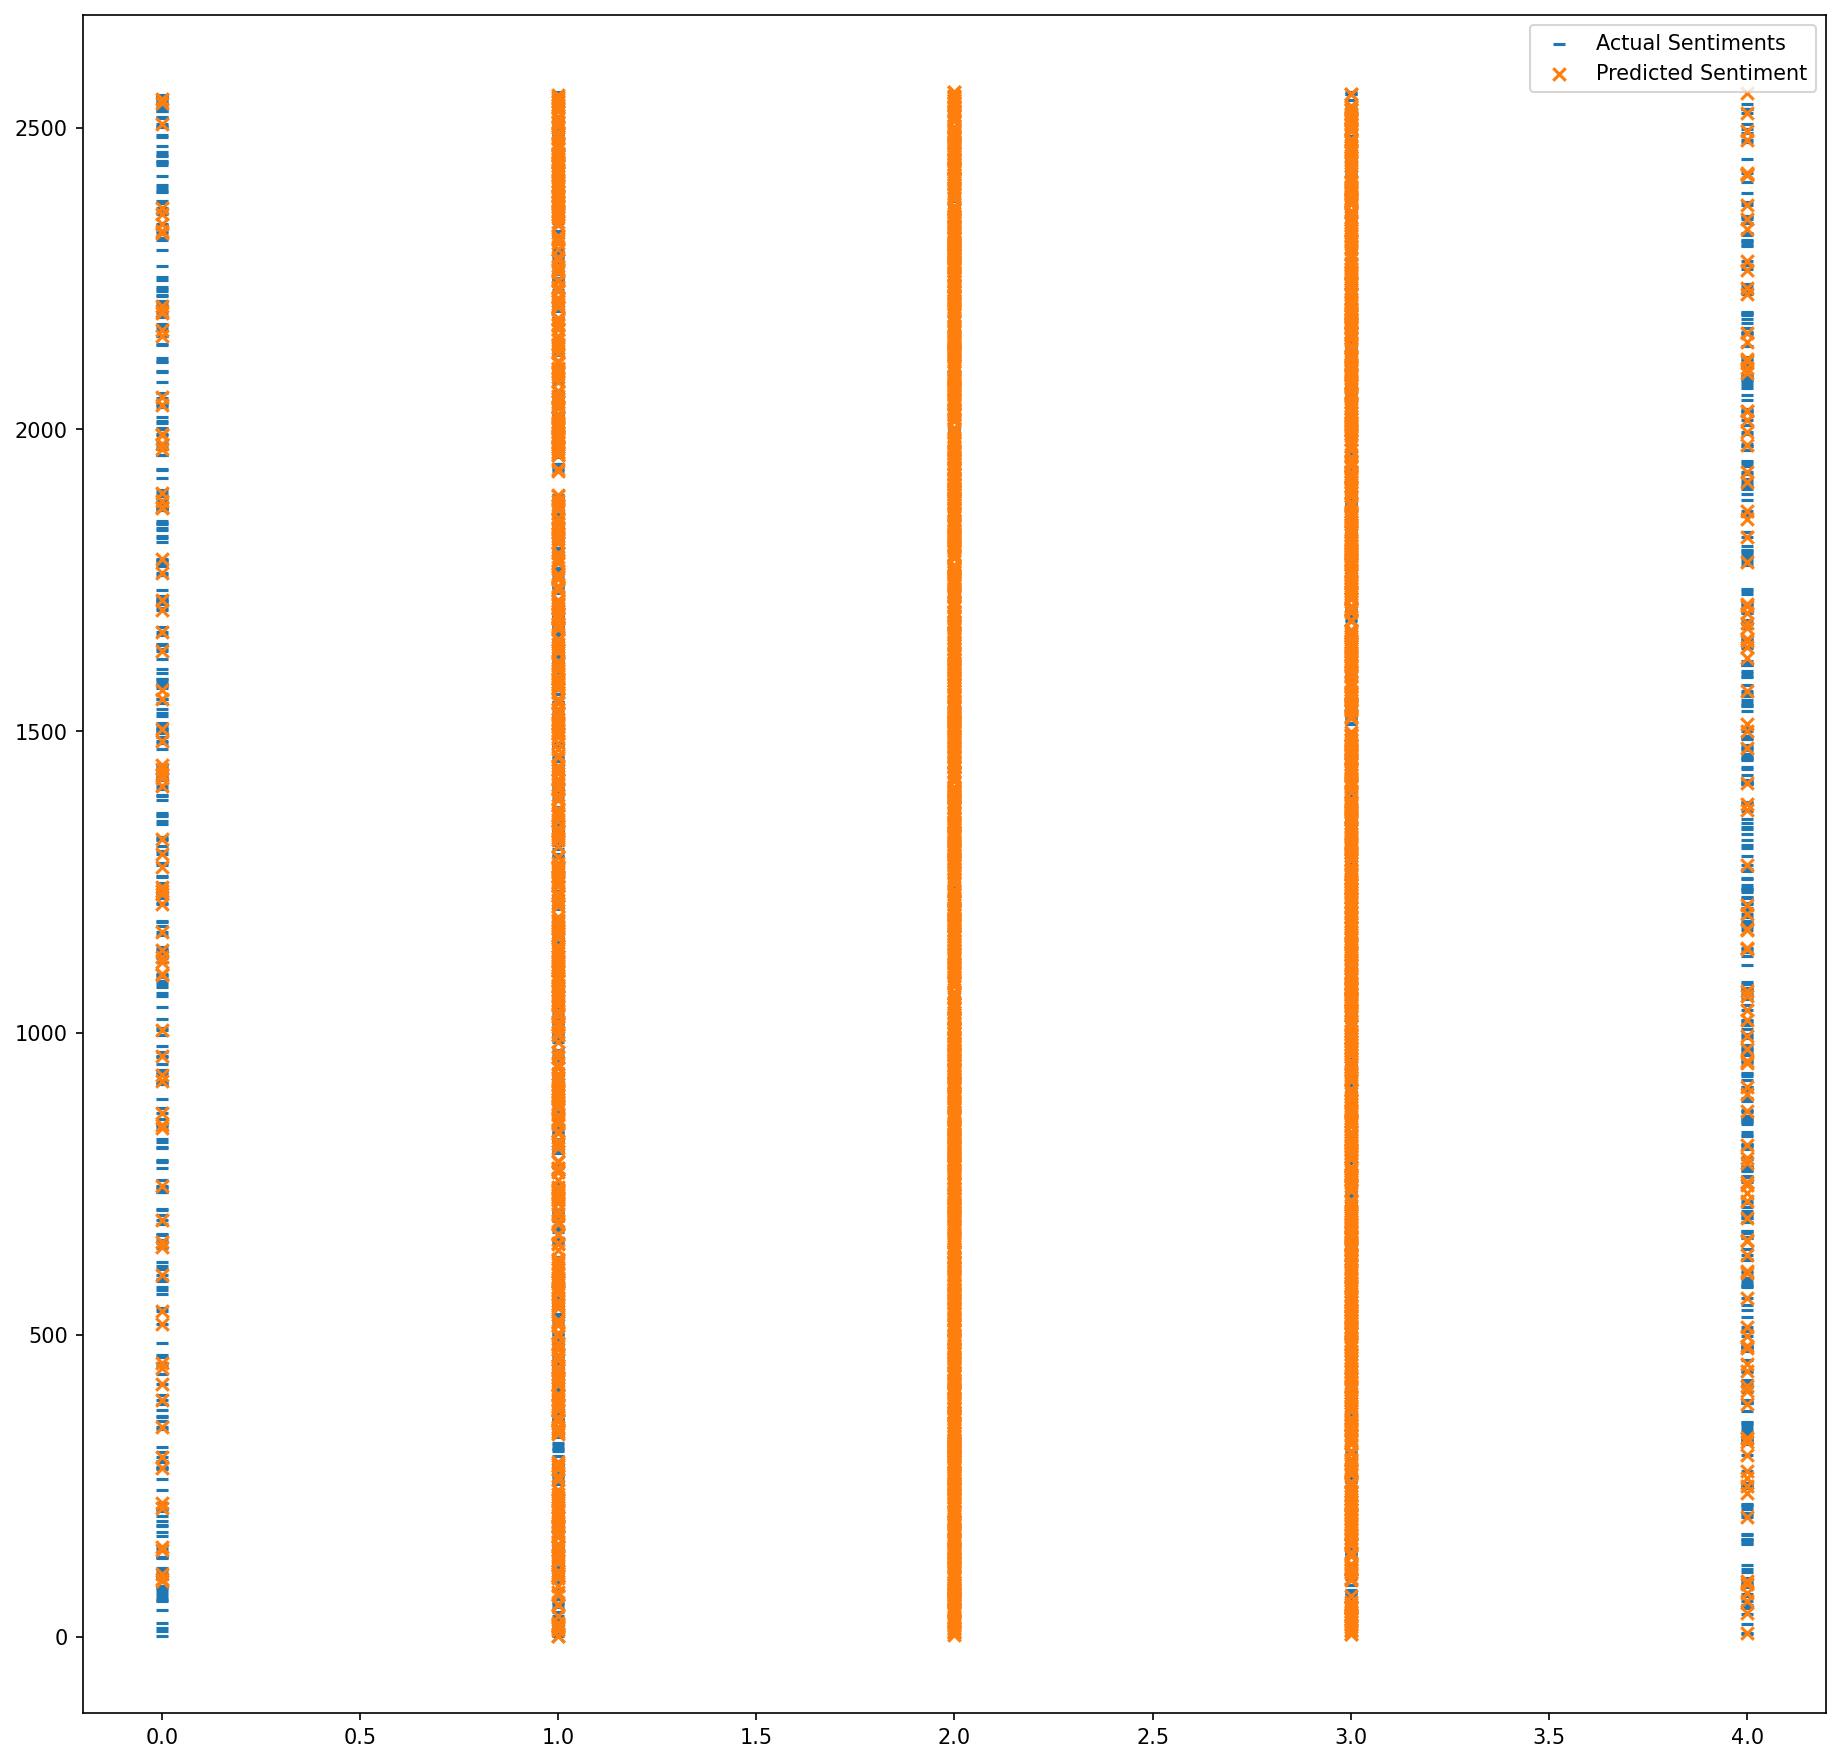

[1, 0, 1, 0, -1, 0, 0, 1, 2, 1, 0, 0, 1, -1, 1, 0, 0, 0, 0, 0, -2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 1, 1, 0, -1, 0, 2, 0, 0, -1, 1, 2, 0, -1, -2, 0, 0, 1, 0, -1, 2, 0, 2, 1, 1, 2, -1, -1, 0, -1, 1, -1, -2, -1, 1, 0, 1, -1, 0, -1, 2, 1, 2, -2, 0, 1, 0, -1, 0, -2, 0, 1, 0, -1, 0, -1, 0, 0, -1, 1, 1, 1, 0, 0, -1, 0, 0, -1, 1, -1, 1, 0, 0, -1, -1, 2, 1, 0, -1, 0, -1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, -1, 1, -1, 0, 0, 1, 1, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, -2, -2, -1, 0, 0, 0, 0, 1, 1, -2, 0, -1, 1, 1, 1, 0, -1, 0, 0, -1, 0, 0, -2, 0, 1, 1, 1, 1, -1, 0, 0, 2, 0, 1, -1, 1, 0, -1, 0, 0, 2, -1, 0, 0, 0, -1, 0, 1, -1, 1, 0, 3, -1, 0, -1, -1, -1, 0, -1, 0, -1, 1, 0, 0, 0, 1, -1, 0, 0, 0, 0, -1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, -2, 0, -2, -1, 0, 0, 0, 1, -1, 1, 0, 0, 1, -1, 1, 2, -1, 1, 1, -1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, -1, 1, 1, -1, 2, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, -1, 0

In [51]:
#sent = selene.test(weight = .75, minFreq = 3)
#sent2 = selene2.test(weight = .75, minFreq = 3)
sent3 = selene3.test(weight = .75, minFreq = 5)
sent3['Actual Sentiment'] = list(y_test)
max_error = .5
margins, avg_error, acc = findAcc(sent3, max_error)

In [52]:
#sent2

In [53]:
#sent.to_csv('Predicted_Results.csv', index=False)
#sent2.to_csv('Predicted_Results2.csv', index=False)